<a href="https://colab.research.google.com/github/LethallyHealthy/data-science/blob/main/Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability Assignment: Fernando Mantilla 301-102

To get full credit in this assignment you need to use only `numpy` or `jax` libraries  and include adequate explanation of the code in either markdown cells or code comments. Sometimes you need to type equations - type equations in latex math notation. 

PS: Please note that we run through chatGPT the questions and you will be referred to the Dean if we find that a robot answered your questions. .

## Question 1a (10 points)

In a private subreddit people are posting their opinions on the CEO of the company you work for. Lets assume that the employees that are posting are random logging in to that subreddit and that each post indicates whether the employee approves or not the job that the CEO is doing. Let $x_i$ be the binary random variable where $x_i=1$ indicates approval. You can assume that $x$ is distributed according to a Bernoulli distribution with parameter $p=1/2$.

Your job is to sample $n=50$ posts and estimate the approval rate of the CEO by considering the statistics of $y=x_1+x_2+ \dots + x_n$. What is the probability that 25 employees approve the CEO?

## Question 1b (10 points)

Following your findings in Q1a, read about the [Cenral Limit Theorem](https://en.wikipedia.org/wiki/Central_limit_theorem) and recognize that 

$$z=\frac{y-\mu_y}{\sigma_y}$$ 

is normally distributed with mean 0 and variance 1.

Can you find the  probability that 25 employees approve the CEO using the Gaussian approximation?


#Answer 1A
To simulate the data collection, we use the numpy library's binomial distribution method with n = 1, to simulate the Bernoulli distribution.
```
import numpy as np
n = 1
p = 0.5
emails = 50
# A bernoulli distribution with 50 trials
x = np.random.binomial(n, p, emails)
```
 The function will return an array of 50 integers (0 or 1), each representing a sample email where 1 is approval.
 From this sample data, we can derive an approval rating which will serve as the estimate of the approval rating of the CEO (the probability that an email will approve the CEO's work)


```
approvals = sum(x) #y = x1+ x2 + x3 + ... + xi
approval_rating = approvals/emails

```
Then, we can use the functional defintion of a binomial distribution to see what the probability is that 25 employees approve of the CEO. The definition is give below, where *N* is the number of successes, *n* is the number of trials, and *p* is the probability of success.
$$P(N)={n\choose N}(p)^{N}(1-p)^{N}$$ 

Without taking samples from the population, $ P(X = 25) = {50\choose25}(0.5)^{25}(0.5)^{25} = 11.2275\%$ as calculated by the binomial distribution function.


```
#N is 25, n is 50, p is the approval rating
probability = math.comb(emails,25)*math.pow(approval_rating, 25)*math.pow(1-approval_rating,25)
```
#Answer 1B
Since we have taken 50 samples from the population, we can estimate the same probability using a *normal approximation*, as described by the central theorem limit above. In the code I use, $y = x_{1} + x_{2} + ... + x_{n} = approvals.$
 The sample mean or $\mu_{y}$ is equal to $Np$, or $emials * approval\_rate = approvals$, since it follows a binomial distribution. The sample deviation, or $σ_y$, is equivalent to $\sqrt{N*p*(1-p)}$, where n is the number of emails, and p is the approval rating.

To find the probability of there being 25 approvals, we can use $$z = \frac{y-\mu_y}{σ_y}$$ with correction to normally approximate the binomial distribution.



In [32]:
import numpy as np
import math

print("ANSWER 1A\n")
#create sample data
n = 1
p = 0.5
emails = 50 #this is equivalent to the N or the number of trials
x = np.random.binomial(n,p,emails)
print(x)

#find approval rating 
approvals = sum(x)
approval_rating = approvals/emails
print("The approval rating is: " + str(approval_rating))

#use approval rating to calculate probability that 25 emails are approvals
probability = math.comb(emails,25)*math.pow(approval_rating,25)*math.pow(1-approval_rating,25)
print(str(probability*100) + "% is the probability of 25 employees approving the CEO's work")



print("\nANSWER 1B\n")
N = emails
y = approvals
sample_mean = N*approval_rating
sample_deviation = math.sqrt(N*approval_rating*(1-approval_rating))
z1 = (25.5-y)/(sample_deviation)
z2 = (24.5-y)/(sample_deviation)
import scipy.stats as stats
print(str(100*abs(stats.norm.sf(z1)-stats.norm.sf(z2))) + "% as calculated by a gaussian distribution (z-scores)")


ANSWER 1A

[1 1 1 1 1 1 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 1 0
 0 1 1 1 1 1 0 1 1 0 1 1 0]
The approval rating is: 0.64
1.4582949893666295% is the probability of 25 employees approving the CEO's work

ANSWER 1B

1.4178402713844296% as calculated by a gaussian distribution (z-scores)


## Question 2 (20 points)

A sequential experiment involves repeatedly drawing a ball from one of the two urns, noting the number on the ball and replacing the ball in the urn. Urn 0 contains a ball with the number 0 and two balls with the number 1. Urn 1 contains five balls with the number 0 and one ball with the number 1. 

The urn from which the first ball is drawn is selected by flipping a fair coin. Urn 0 is used if the outcome is H and urn 1 is used if the outcome is T. **The urn used in a subsequent draws corresponds to the number on the ball drawn in the previous draw.** 

What is the probability of a specific sequence of the numbers on drawn balls being 0011 ? 

#Answer 2


To get the sequence 0011, we must identify that with replacement, this experiment is a string of independent events. Because of the coin flip, there are two possible string of events needed to get the sequence 0011. In other words, $P(0011)$ is dependent on that inital coin flip

**Situation 1: Heads**

The chance of a heads being flipped and starting with the 0 urn, or $P(H)$, is $0.5$. Below is the calculation for achieving a 0011 sequence of balls assuming a heads start, or $P(0011 | H)$

1.   Starting with the 0 urn, the chance to pull a 0 is 1/2.
2.   Using the 0 urn again, the chance to pull a 0 is another 1/2.
3.   Using the 0 urn again, the chance to pull a 1 is still 1/2.
4.   Now, using the 1 urn, the chance to pull a 1 is 1/6.
  
Since each pull is techincally an independent event, total chance of pulling the sequence, $P(0011|H)$, is calculated using the multiplication rule. In this case: $$P(0011|H) = \frac{1}{2} * \frac{1}{2} * \frac{1}{2} * \frac{1}{6} = \frac{1}{48} = 0.0208333... or \space 2.08\%$$

The chance of both of these events happening is calculated as: $$P(H \space AND \space 0011) = P(H) * P(0011|H) = \frac{1}{2} * \frac{1}{48} = \frac{1}{96} = 0.0104666.. or \space 1.05\% $$

**Situation 2: Tails**

The chance of a tails being flipped and starting with the 1 urn, or $P(T)$ is $0.5$.

The chance of then pulling the sequence 0011 with a tails start, or $P(0011|T)$ changes in that first pull. Starting with the 1 urn, the chance to pull a 0 is 5/6. The next 3 pulls are calculated the same as $P(0011|H)$, making the probability: $$P(0011|T) = \frac{5}{6} * \frac{1}{2} * \frac{1}{2} * \frac{1}{6} = \frac{5}{144} = 0.0347222...or \space 3.47\%$$

The chance of both of these events hapenning is calculated as: $$P(T \space AND \space 0011) = P(T)*P(0011|T) = \frac{1}{2} * \frac {5}{144} = \frac{5}{288} = 0.01736111... or \space 1.74\%$$

**Conclusion**

Using the total probability rule, we are able to determine that the probability of the sequence 0011 being pulled, $P(0011)$ is equivalent to $P(H)*P(0011|H) + P(T)*P(0011|T) = 1.05\% + 1.74\% = 2.79\%$

## Question 3 (20 points) 

Referring to Example 6.6 of the  [Math for ML book](https://mml-book.github.io/book/mml-book.pdf), simulate and plot the bivariate normal distribution with the shown parameters using the [Cholesky factorization](https://numpy.org/doc/stable/reference/generated/numpy.linalg.cholesky.html) for the simulation. 


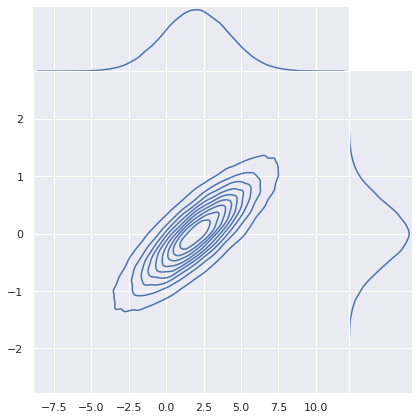

In [31]:
# Type the Python code here and ensure you save the notebook with the results of the code execution.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

d = 2

mu = np.array([0,2]).reshape(2,1) #mean vector
sig = np.array([[0.3, 1],[1,5]]) #covariance matrix
L = np.linalg.cholesky(sig)

n = 100000
u = np.random.normal(loc = 0, scale =1, size = d*n).reshape(d,n)
x = mu + np.dot(L, u)

sns.jointplot(x=x[1], y = x[0], kind = "kde", space =0)


## Question 4 (20 points)

Go through the provided links on [Poisson](https://dlsun.github.io/probability/poisson.html) and [exponential distributions](https://dlsun.github.io/probability/exponential.html) as the `Math for ML` textbook in your course site  is not covering enough these important distributions.

Watch this video https://www.youtube.com/watch?v=Asto3RS46ks where the author is explaining how to simulate a Poisson distribution from scratch. 

1. Using the Kaggle API download [this dataset](https://www.kaggle.com/datasets/new-york-city/nyc-east-river-bicycle-crossings) and plot the histogram of the number of cyclists that cross the Brooklyn bridge per day.  
2. Simulate the number of cyclists that cross the Brooklyn bridge per day using the Poisson distribution. Ensure that the simulated counts are similar distribution-wise to the observed counts.


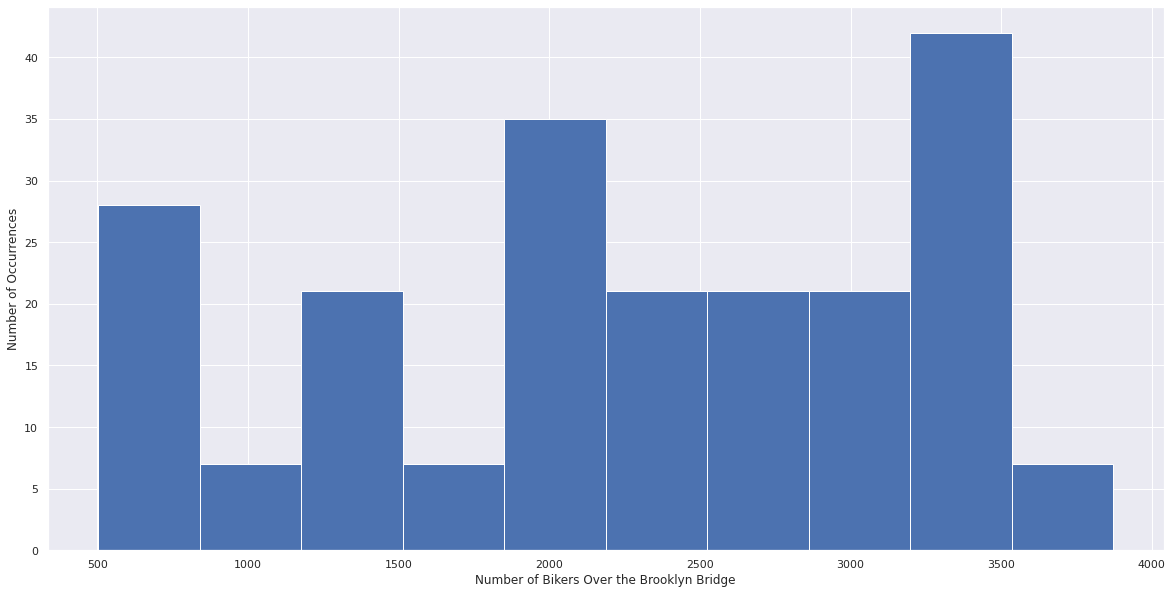

<Figure size 1800x720 with 0 Axes>

In [36]:
# Type the Python code here and ensure you save the notebook with the results of the code execution.
#Part 1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# make data
d = pd.read_csv("/nyc-east-river-bicycle-counts.csv")

x = d["Brooklyn Bridge"] #collect the column where the number of arrivals on the Brooklyn Brige is recorded

plt.xlabel("Number of Bikers Over the Brooklyn Bridge")
plt.ylabel("Number of Occurrences")

plt.hist(x)
plt.figure(figsize=(25,10))
plt.show()


[2186, 2257, 2298, 2274, 2300, 2331, 2299, 2277, 2295, 2287, 2261, 2294, 2250, 2311, 2304, 2278, 2349, 2244, 2259, 2283, 2235, 2315, 2291, 2309, 2303, 2341, 2270, 2270, 2324, 2157, 2262, 2155, 2285, 2282, 2229, 2237, 2321, 2241, 2306, 2263, 2284, 2273, 2256, 2275, 2243, 2377, 2273, 2273, 2242, 2273, 2322, 2239, 2246, 2303, 2268, 2281, 2282, 2221, 2313, 2262, 2241, 2312, 2213, 2232, 2335, 2326, 2209, 2191, 2225, 2324, 2298, 2227, 2318, 2300, 2337, 2273, 2265, 2220, 2296, 2202, 2259, 2308, 2219, 2312, 2253, 2274, 2291, 2300, 2269, 2280, 2225, 2276, 2314, 2271, 2249, 2278, 2339, 2356, 2241, 2305, 2222, 2285, 2329, 2266, 2175, 2193, 2257, 2245, 2226, 2293, 2351, 2239, 2384, 2229, 2256, 2206, 2327, 2302, 2231, 2293, 2267, 2293, 2338, 2282, 2322, 2279, 2324, 2322, 2258, 2300, 2256, 2238, 2221, 2255, 2243, 2279, 2315, 2280, 2314, 2263, 2275, 2295, 2264, 2241, 2297, 2239, 2238, 2278, 2250, 2273, 2308, 2217, 2265, 2224, 2240, 2303, 2258, 2324, 2271, 2248, 2237, 2234, 2250, 2249, 2277, 2382, 231

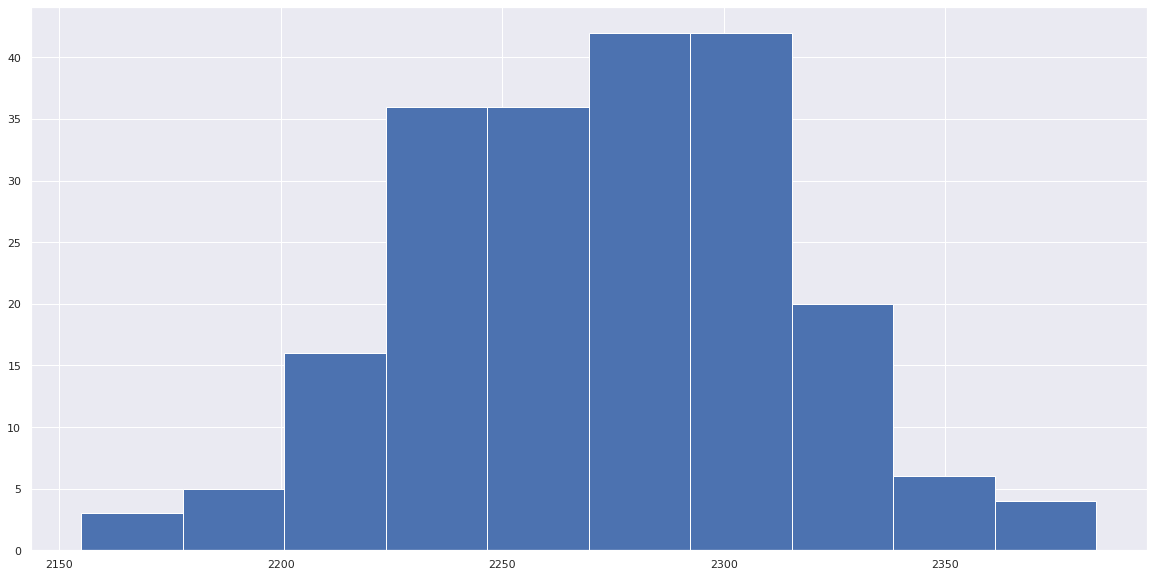

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# make data
d = pd.read_csv("/nyc-east-river-bicycle-counts.csv")

x = d["Brooklyn Bridge"]

lam = int(x.mean())/24 #This average was originally number of arrivals per day. I lowered lambda so the operations wouldn't overflow later on

#provided by the YouTube video
def poisson(lam):
  el, n, u = np.exp(-1*lam), 0, np.random.uniform(0,1)
  pp, fact, pow = el, 1, 1
  while u>pp:
    n = n + 1
    fact, pow = n*fact, lam*pow #this was giving me problems
    pp += (pow/fact)*el
  return n


s = []
for i in range(210):
  sum =0
  for i in range(24): # to account for the lowered lambda, and to try to mimic the data
    sum += poisson(lam)
  s.append(sum)
print(s)
plt.hist(s)
plt.show()

**Final Thoughts**

Overall, I think the data was difficult to represent using poisson. I suspect that either the data does not really follow a Poisson distribution, or more likely, my way of calculating lambda was naive.

# Question 5 (20 points)

You are asked to stress test an cloud API endpoint and are told that the API exposes a database server that can be abstracted as an M/M/1 queue. Go through [this introductory](https://queue-it.com/blog/queuing-theory/) page to just understand the queuing domain and the notation M/M/1. Go also through the elements of the MM1 queue [here](https://en.wikipedia.org/wiki/M/M/1_queue). Make sure you click on the links and learn about the random process called Poisson process. 


Your task is to simulate the behavior of the queue and plot the number of requests that are waiting in the queue as a function of time. You are given three arrival rates of the API requests $\lambda=[1, 3, 4]$ and the service time of the requests as an exponential random variable with rate $\mu=4$. 

   

Essentially, this question requires that we create a random dataset of times, such as when a person arrives, when they are able to be served, and when they leave the database server. It can be boiled down to creating an array of times based off of an exponential distribution. The inverse of lambda, the average arrivals in a set amount of time, can be inversed to find the average amount of time until an arrival. 

A random set of times for arrivals and departures would allow for the calculation of times when the server can start working on a particular customer and when they finish.

The first step is creating the times of length n. Then it would be processing these times into "jobs" to see when the API is available or when it is busy. '

The jobs then can be processed further to record the queue of the machine. In other words, we record every change in the queue, whenever a person arrives, starts, and leaves. This along with the lower bound of the time interval of the action, can be recorded to find the time vs. the number of requests waiting in the queue. The simulation just needs to be repeated 3 times.

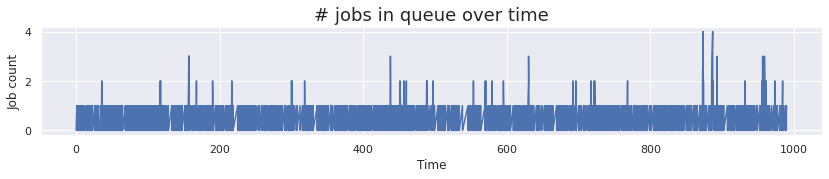

Graph for lambda = 1




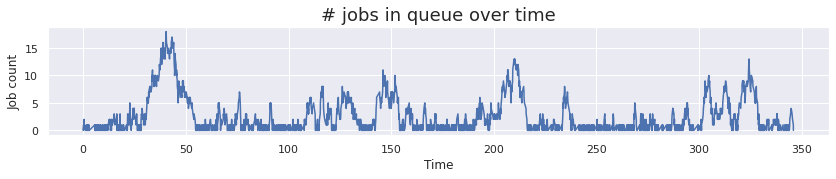

Graph for lambda = 3




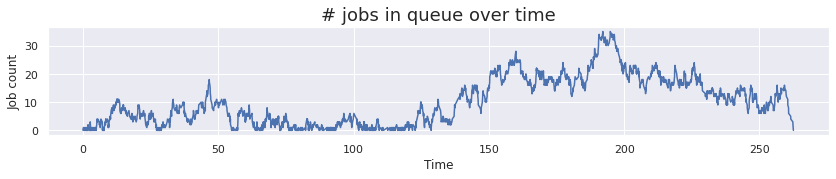

Graph for lambda = 4




In [67]:
# THIS IS BASED OFF OF THIS PROJECT https://github.com/williewheeler/stats-demos/blob/master/queueing/single-queue-sim.ipynb JUST MODIFIED TO FIT THE PROJECT
# Type the Python code here and ensure you save the notebook with the results of the code execution.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

lambdas = [1,3,4]
mu = 4
trials = 1000 # number of trials

def simulation(n, arrival_rate, service_rate):

  mean_time_between_arrivals= 1.0/arrival_rate
  mean_service_time = 1.0/service_rate

  interarrival_times = np.random.exponential(scale=mean_time_between_arrivals, size=n) #since poisson and exponential are essentially the same, just flip the lambdas
  arrival_times = np.cumsum(interarrival_times) #this is so we can work with times, instead of a number of events
  service_times = np.random.exponential(scale=mean_service_time, size=n)

  n_jobs = create_jobs(n, interarrival_times, arrival_times, service_times)
  timeline = process_jobs(n, n_jobs)
  plot_queue_over_time(timeline)

def create_jobs(n, interarrival_times, arrival_times, service_times):
  jobs = pd.DataFrame( {
      "arrival_times": arrival_times,
      "service_times": service_times,
      "start_time": np.zeros(n), 
      "end_time" : np.zeros(n)})
  jobs.loc[0, "start_time"] = jobs.loc[0, "arrival_times"] #start when a person arrives
  jobs.loc[0, "end_time"] = jobs.loc[0, "start_time"] + jobs.loc[0, "service_times"] #end after they arrive and the time it takes for their service
  for i in range(1,n):
    jobs.loc[i, "start_time"] = max(jobs.loc[i, "arrival_times"], jobs.loc[i-1, "end_time"]) #the next person can start after the current person ends, but only until they arrive
    jobs.loc[i, "end_time"] =  jobs.loc[i, "start_time"] + jobs.loc[i, "service_times"] #the current job ends after they start and have been served
  return jobs

def process_jobs(n, jobs):
  trials = n
  arrivals = jobs["arrival_times"]
  start_times = jobs["start_time"]
  end_times = jobs["end_time"]

  arrival_index = 0
  start_index = 0
  end_index = 0

  lower_bound = 0
  num_jobs_in_q = 0
  timeline = pd.DataFrame(columns=["num_jobs_in_q", "nq_change", "lower_bound", "upper_bound"])

  while end_index < n: #essentially go through all the jobs
    if arrival_index < n: # as long as we are within n, the current_arrival has a time value
      current_arrival = arrivals[arrival_index]
    else:
      current_arrival = float("inf")
    if start_index < n:
      current_start = start_times[start_index]
    else:
      current_start = float("inf")
    if end_index < n:
      current_end = end_times[end_index]
    else:
      current_end = float("inf")
  
  #count the number of arrivals and keep track of the changes in the queue (people waiting)
  #the time progresses by doing the action which comes first (if someone gets served before the next arrives, the q should lower)
    if current_arrival <= current_start and current_arrival <= current_end:
      nq_change = 1
      upper_bound = current_arrival # to keep track of time
      arrival_index += 1
    elif current_start <= current_arrival and current_start <= current_end:
      nq_change = -1
      upper_bound = current_start
      start_index += 1
    else:
      nq_change = 0
      upper_bound = current_end
      end_index += 1

    timeline = timeline.append({
        "num_jobs_in_q": num_jobs_in_q,
        "nq_change": nq_change,
        "upper_bound": upper_bound,
        "lower_bound": lower_bound
    }, ignore_index = True)
    
    lower_bound = upper_bound
    num_jobs_in_q += nq_change
  return timeline

def plot_queue_over_time(timeline):
  plt.figure(figsize=(14, 2))
  plt.title("# jobs in queue over time", size=18)
  plt.xlabel("Time")
  plt.ylabel("Job count")
  plt.plot(timeline["lower_bound"], timeline["num_jobs_in_q"])
  plt.show()

for lam in lambdas:
  simulation(trials, lam, mu)
  print("Graph for lambda = " + str(lam) + "\n\n")
